In [ ]:
!pip install open3d

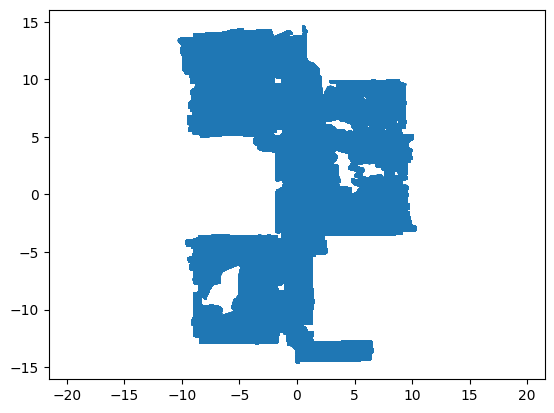

In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# Load a PLY file
pcd = o3d.io.read_point_cloud("3_5_2024.ply")

# Convert to numpy array
points = np.asarray(pcd.points)

# Plotting a simple 2D projection
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.scatter([-20]*len(points[:, 0]), )
plt.axis('equal')
#plt.grid(False)
#plt.axis('off')
plt.savefig("2Dpoints_map.jpg")

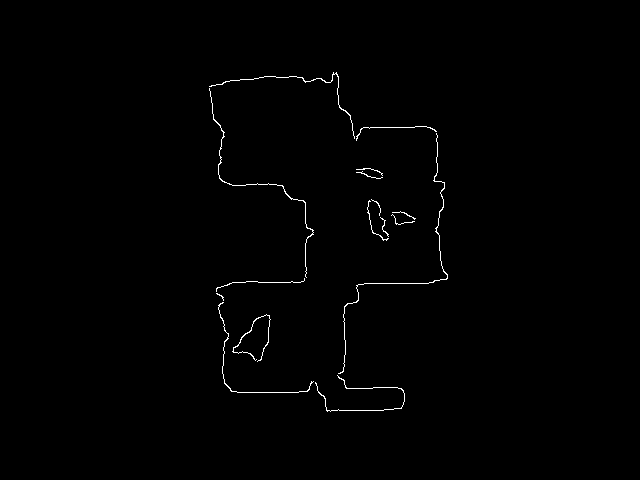

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

path = '2Dpoints_map.jpg'

img = cv2.imread(path)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gauss15 = cv2.GaussianBlur(gris, (15,15), 0)
canny = cv2.Canny(gauss15, 50, 150)
cv2_imshow(canny)

In [ ]:
lenF, lenC = canny.shape

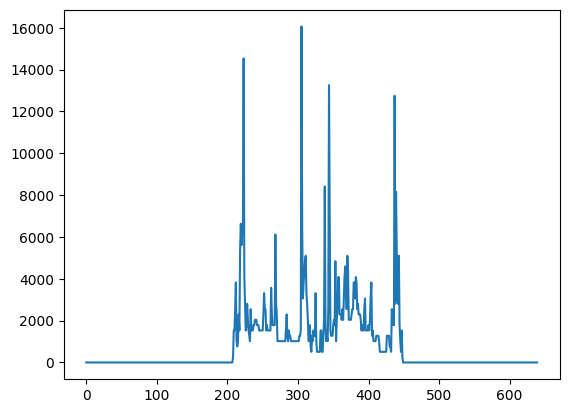

In [ ]:
def hallar_X(canny):
  sum_columnas = np.sum(canny, axis=0)
  #plt.plot(sum_columnas)
  threshold = np.quantile(sum_columnas, 0.995)
  picos = sum_columnas[sum_columnas >= threshold]
  Xs = [list(sum_columnas).index(p) for p in picos]
  return Xs